In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                  header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
df.columns = ['age','sex','cp','restbp','chol','fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
df.info()
# no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
df.describe(include='all')

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


# Data Cleaning

In [7]:
df[df['ca']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [8]:
df[df['thal']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [9]:
# only 6 records with missing values (indicated by '?'), just drop them
to_drop = list(df[df['ca']=='?'].index.values) + list(df[df['thal']=='?'].index.values) # get the index list to drop records
df.drop(to_drop, axis=0, inplace=True) # indicate drop by index of rows rather than column names

In [10]:
# conver the 'ca' and 'thal' categorical features into numeric
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


# Data Exploration: Continuous Variables

<Axes: xlabel='hd', ylabel='thalach'>

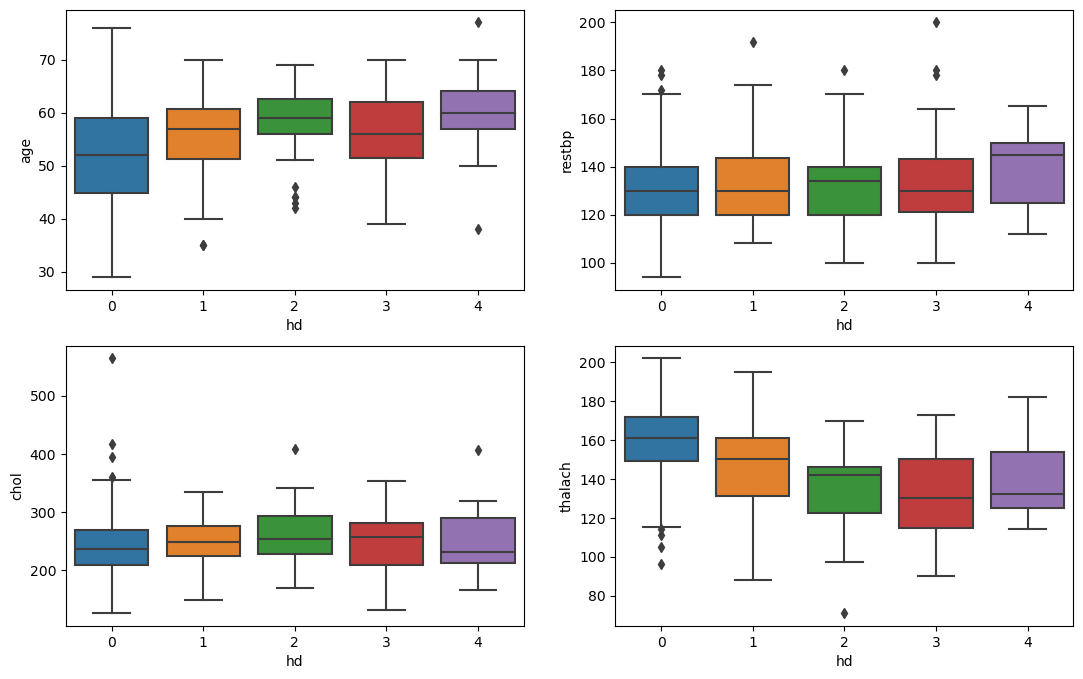

In [11]:
import seaborn as sns
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(13,8))
# each tuple represents the row (number of elements in a tuple = number of graphs in a row)

sns.boxplot(x='hd',y='age', data=df, ax=ax1)
sns.boxplot(x='hd',y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd',y='chol', data=df, ax=ax3)
sns.boxplot(x='hd',y='thalach', data=df, ax=ax4)
# only plot the boxplot for continuous variables (no categorical variable boxplot be drawn)

# Check Categorical Variable

In [12]:
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
hd,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13



### As some models do not perform well on the granular categorical variables or categorical variables with imbalanced categorical values, we need to ensure the numbers of categorical values in the categorical variables are balanced (so the model have enough info to capture patterns in any one of the categorical values, and will not biased towards to the dominant categorical values) -> So you can combine some categorical values into one
### Some models do not perform well due to the high variability of the categorical variables 

In [13]:
# convert heart disease variable into a binary categorical variable (has hd or not)
# map 1-4 to type = 1
mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
df['hd_cons'] = df['hd'].map(mapping)


In [14]:
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_cons
hd,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [15]:
df.groupby('hd_cons').count()
# more balanced target variable is obtained 

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
hd_cons,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137


<Axes: xlabel='hd_cons', ylabel='thalach'>

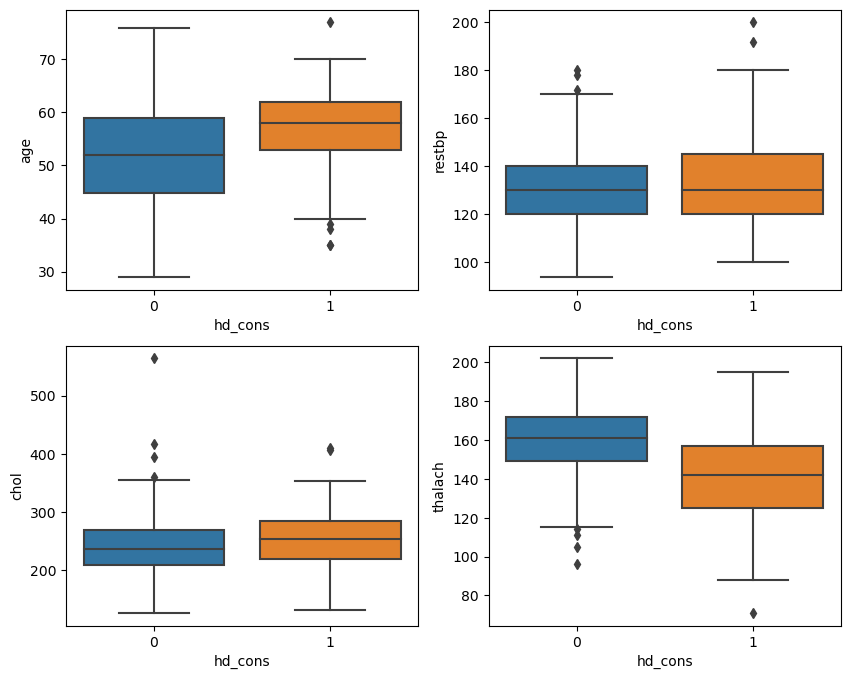

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd_cons',y='age', data=df, ax=ax1)
sns.boxplot(x='hd_cons',y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd_cons',y='chol', data=df, ax=ax3)
sns.boxplot(x='hd_cons',y='thalach', data=df, ax=ax4)

In [17]:
df.groupby(['hd','sex'])['thal'].count().unstack()
# more men (sex = 1) than women have hd > 1
# implying that the feature 'sex' may be a good predictor of hd
# or we simply have less women data records in the dataset
# Howeve, since we cannot be certain about the discriminative power this feature has, we can use it for training

sex,0.0,1.0
hd,,
0,71,89
1,9,45
2,7,28
3,7,28
4,2,11


In [18]:
df.groupby(['hd','cp'])['thal'].count().unstack()

cp,1.0,2.0,3.0,4.0
hd,,,,
0,16.0,40.0,65.0,39.0
1,5.0,6.0,9.0,34.0
2,1.0,1.0,4.0,29.0
3,NaN,2.0,4.0,29.0
4,1.0,NaN,1.0,11.0


In [19]:
df.groupby(['hd_cons','cp'])['thal'].count().unstack()

cp,1.0,2.0,3.0,4.0
hd_cons,,,,
0,16,40,65,39
1,7,9,18,103


In [20]:
df.groupby(['hd','fbs'])['thal'].count().unstack() # blood sugar (feature 'fbs') may not be a good predictive feature
# because the number of records with 'fbs' = 0 is small, not enough to train the model to learn the patterns
# but more inspections needed

fbs,0.0,1.0
hd,,
0,137,23
1,51,3
2,27,8
3,27,8
4,12,1


blood sugar (fbs) may not be a great predictive variable because the people who do not have fbs (fbs=0) have the same likelihood of having hd or not having hd with the people who do have fbs (fbs=1) due to the similar proportions of people who have fbs and not have fbs between having hd and not having hd

In [21]:
fbs = df.groupby(['hd_cons','fbs'])['thal'].count().unstack() 
fbs['total'] = fbs[0.0] + fbs[1.0]
fbs['percent_fbs_0'] =  fbs[0.0]/fbs['total']
fbs['percent_fbs_1'] =  fbs[1.0]/fbs['total']
fbs

fbs,0.0,1.0,total,percent_fbs_0,percent_fbs_1
hd_cons,,,,,
0,137,23,160,0.856250,0.143750
1,117,20,137,0.854015,0.145985


In [22]:
df.groupby(['hd','restecg'])['thal'].count().unstack()

restecg,0.0,1.0,2.0
hd,,,
0,92.0,1.0,67.0
1,23.0,NaN,31.0
2,18.0,1.0,16.0
3,12.0,1.0,22.0
4,2.0,1.0,10.0


In [23]:
df.groupby(['hd_cons','restecg'])['thal'].count().unstack()

restecg,0.0,1.0,2.0
hd_cons,,,
0,92,1,67
1,55,3,79


In [24]:
df.groupby(['hd','slope'])['thal'].count().unstack()

slope,1.0,2.0,3.0
hd,,,
0,103,48,9
1,22,30,2
2,7,25,3
3,6,24,5
4,1,10,2


In [25]:
df.groupby(['hd_cons','slope'])['thal'].count().unstack()

slope,1.0,2.0,3.0
hd_cons,,,
0,103,48,9
1,36,89,12


In [26]:
df.groupby(['hd','exang'])['thal'].count().unstack()

exang,0.0,1.0
hd,,
0,137,23
1,30,24
2,14,21
3,12,23
4,7,6


In [27]:
df.groupby(['hd_cons','exang'])['thal'].count().unstack()

exang,0.0,1.0
hd_cons,,
0,137,23
1,63,74


In [28]:
df.groupby(['hd','ca'])['thal'].count().unstack() # unstack() transform the multi-index 

ca,0.0,1.0,2.0,3.0
hd,,,,
0,129,21,7,3
1,26,19,6,3
2,8,14,9,4
3,8,8,14,5
4,3,3,2,5


In [29]:
df.groupby(['hd_cons','ca'])['thal'].count().unstack()

ca,0.0,1.0,2.0,3.0
hd_cons,,,,
0,129,21,7,3
1,45,44,31,17


In [30]:
df.groupby(['hd','thal'])['ca'].count().unstack()

thal,3.0,6.0,7.0
hd,,,
0,127,6,27
1,22,3,29
2,7,6,22
3,6,1,28
4,2,2,9


In [31]:
df.groupby(['hd_cons','thal'])['ca'].count().unstack()

thal,3.0,6.0,7.0
hd_cons,,,
0,127,6,27
1,37,12,88


<Axes: xlabel='hd'>

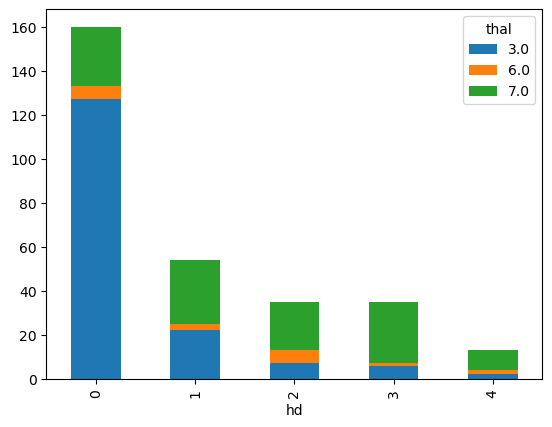

In [32]:
df.groupby(['hd','thal'])['ca'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='hd_cons'>

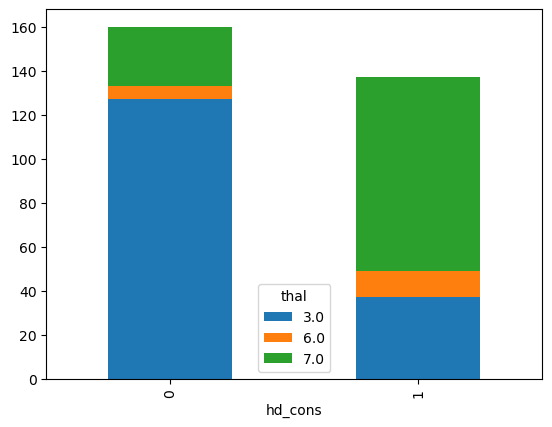

In [33]:
df.groupby(['hd_cons','thal'])['ca'].count().unstack().plot(kind='bar', stacked=True)

In [34]:
cat_columns = ['sex','cp','restecg','slope','ca','thal','exang','fbs']

In [35]:
X = df.iloc[:,:13] # all records with the first 13 columns
Y = df.iloc[:, 13]
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [36]:
Y_v2 = df.iloc[:,14]
Y_v2 

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd_cons, Length: 297, dtype: int64

In [37]:
# you need to get all dummy variables
# because the categorical variables are not rank variable (the numeric meaning in this variable is not used) -> Non-sensical
# from 

X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)
X_encoded

,age,restbp,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, random_state=123) # default test size 20%

In [39]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

We can see from below, the tree is quite deep as we have multiple target variable values to predict, leading the tree without pruning (hyper-parameter tuning) to be quite deep

While the tree is not this deep and horizontally wide when we train it to predict the binary target variable

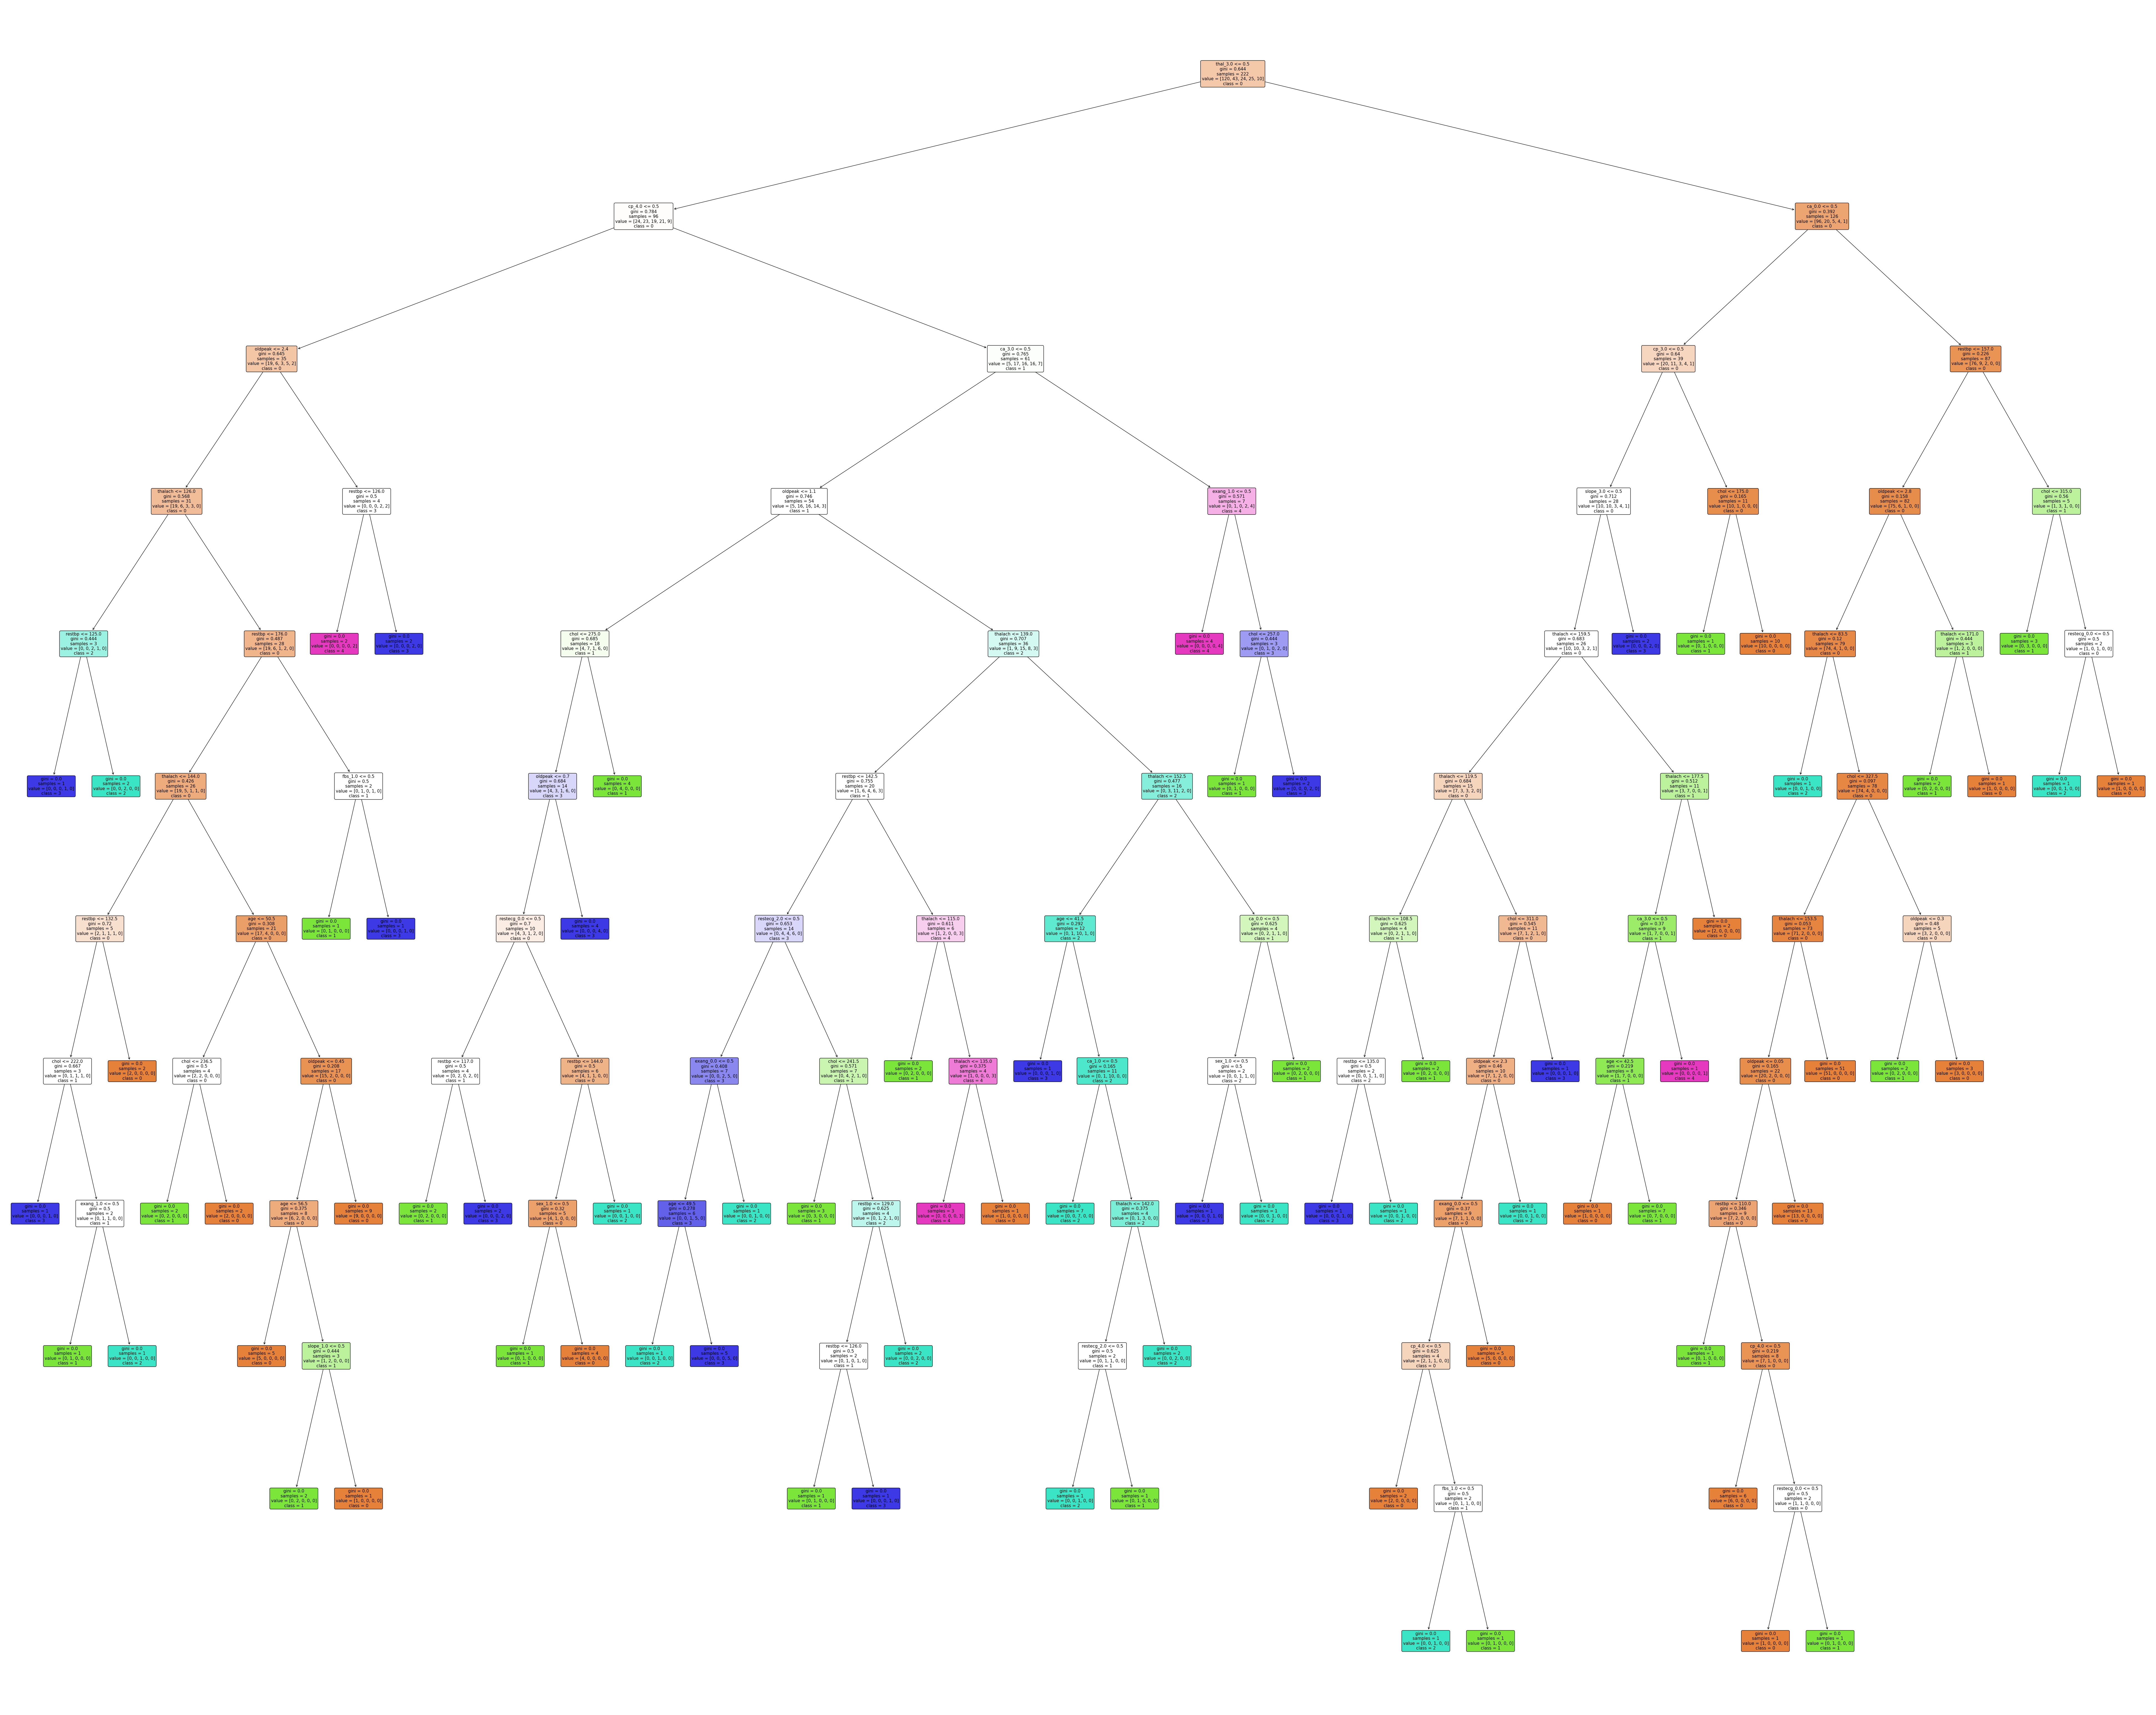

In [40]:
plt.figure(figsize=(100,80))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns.tolist());

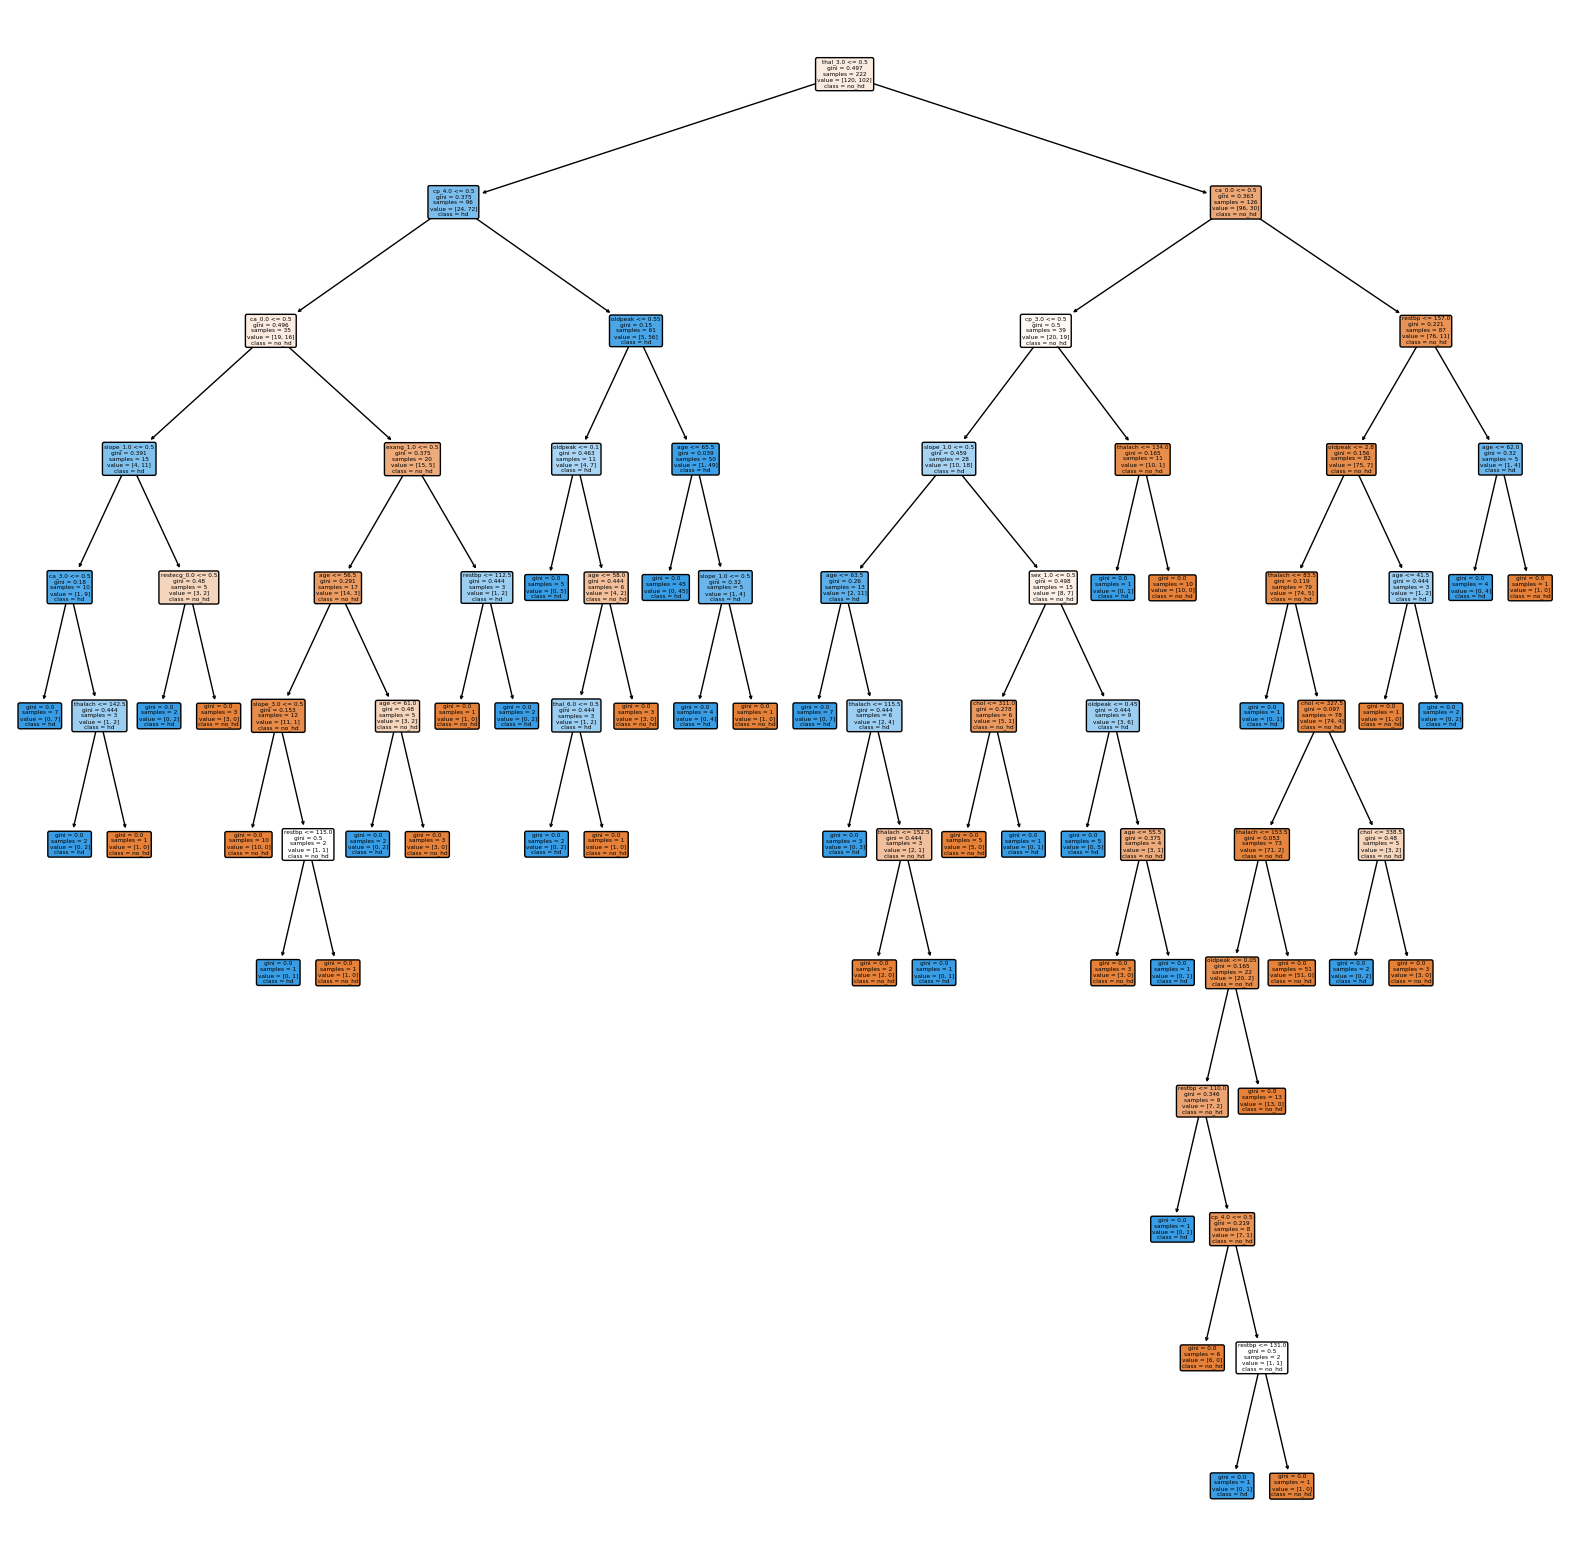

In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v2 = DecisionTreeClassifier(random_state=123)
dt_v2 = dt_v2.fit(X_train2, y_train2)
plt.figure(figsize=(20,20))
plot_tree(dt_v2, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns.tolist());

In [42]:
predicted = dt.predict(X_test)
predicted_v2 = dt_v2.predict(X_test2)
print('v1_model: ', accuracy_score(predicted, y_test))
print('v2_model: ', accuracy_score(predicted_v2, y_test2)) # apprently, the model performs well when the target variable is binary

v1_model:  0.5066666666666667
v2_model:  0.7733333333333333


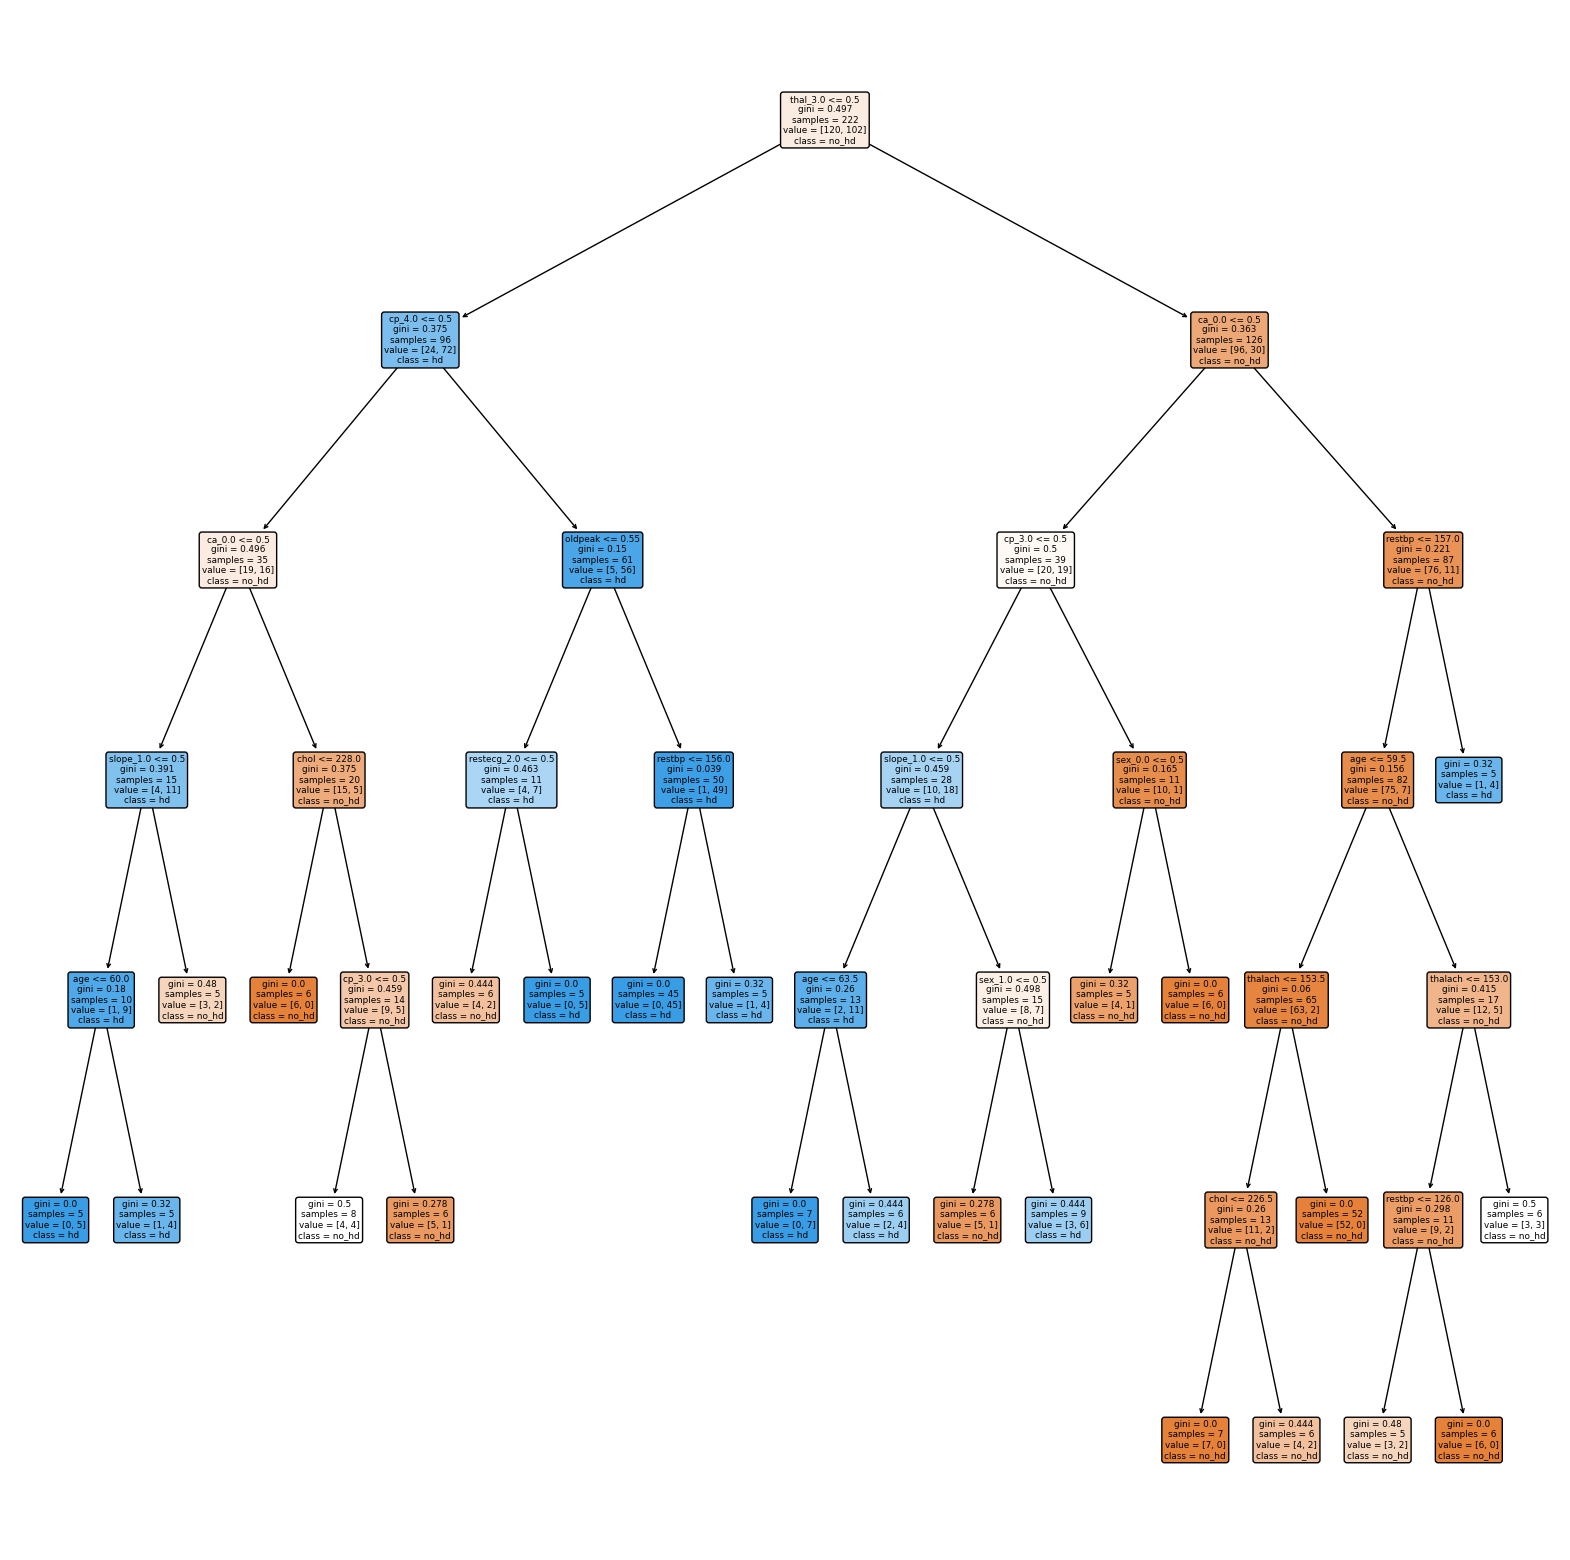

In [43]:
# set hyper-parameters of the tree to avoid over-fitting
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v3 = DecisionTreeClassifier(random_state=123, max_depth = 6, min_samples_leaf = 5)
# each leaf node should have at least 5 records (if the leaf node cannot have 5 records, the splitting should not be performed)

dt_v3 = dt_v3.fit(X_train3, y_train3)
plt.figure(figsize=(20,20))
plot_tree(dt_v3, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns.tolist());


The colour indciates the class label and the lightness of the colour indicates the purity of the node (the darker the colour, the more pure the node)

In [44]:
predicted_train = dt_v3.predict(X_train3)
predicted_test = dt_v3.predict(X_test3)
print('train accuracy: ', accuracy_score(predicted_train, y_train3))
print('test accuracy: ', accuracy_score(predicted_test, y_test3))
# not strongly overfitting, which is desirable


train accuracy:  0.8828828828828829
test accuracy:  0.8266666666666667


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train3, y_train3)
pred3_knn = knn.predict(X_test3.to_numpy())

print(accuracy_score(pred3_knn, y_test3))

0.6266666666666667


/Users/nozomitoujou/anaconda3/envs/DataScience/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
